# TCRE calculation with FaIR

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.functions import emission_profile_function
from climate_models.fair_climate_model import background_species_quantities_function, species_fair_climate_model

In [2]:
profile = "step"
#profile = "1% growth"

start_year = 1999
t0 = 2000

if profile == "step":
    unit_value = 10e12 # 10 GtCO2
    time_horizon = 100
elif profile == "1% growth":
    unit_value = 7.8e12 # 10 GtCO2
    time_horizon = 100

end_year = t0 + time_horizon

emission_profile = emission_profile_function(start_year, t0, time_horizon, profile, unit_value)
background_species_quantities = background_species_quantities_function(start_year, end_year, rcp='None')

In [3]:
sensitivity_erf = 9.2e-16 # Not used with FaIR
ratio_erf_rf = 1
efficacy_rf = 1
efficacy_erf = 1
species_settings = {"sensitivity_erf": sensitivity_erf, "ratio_erf_rf": ratio_erf_rf, "efficacy_erf": efficacy_erf}
model_settings = {"background_species_quantities": background_species_quantities}

radiative_forcing, effective_radiative_forcing, temperature = species_fair_climate_model(start_year, end_year, "Aviation CO2", emission_profile, species_settings, model_settings)

cumulative_emissions = np.zeros(time_horizon+1)
cumulative_emissions[1] = emission_profile[1]
for k in range(2, time_horizon+1):
    cumulative_emissions[k] = cumulative_emissions[k-1] + emission_profile[k+1]

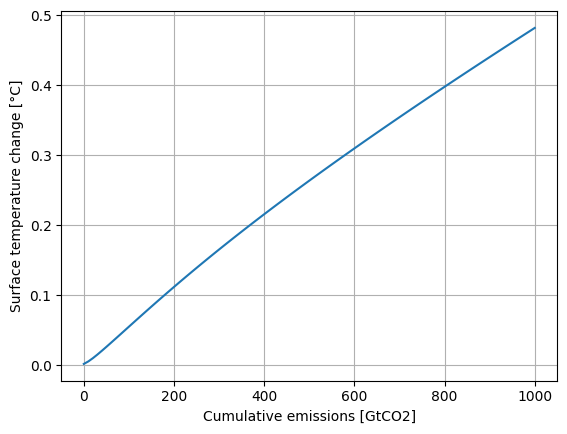

In [4]:
plt.plot(cumulative_emissions/1e12, temperature[t0-start_year:end_year])
plt.xlabel('Cumulative emissions [GtCO2]')
plt.ylabel('Surface temperature change [°C]')
plt.grid()

In [5]:
tcre = np.zeros(time_horizon+1)
cumulative_emissions_1000giga = cumulative_emissions * 10**(-15)
for k in range(1, time_horizon+1):
    tcre[k] = temperature[t0-start_year+k].item() / cumulative_emissions_1000giga[k]

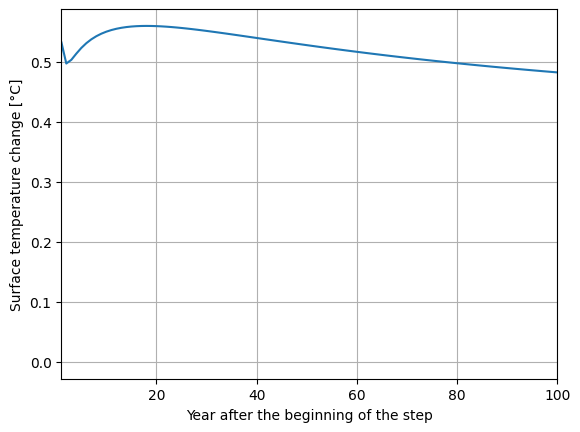

In [6]:
plt.plot(tcre)
plt.xlabel('Year after the beginning of the step')
plt.ylabel('Surface temperature change [°C]')
plt.xlim(1,time_horizon)
plt.grid()